<a href="https://colab.research.google.com/github/HemaRavi94/Pandas/blob/main/assessment2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [ ]:
import pandas as pd

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['college_1.csv','college_2.csv']), ignore_index=True)
print(df)

              Name  python  mysql  Previous Geekions  CodeKata Score  \
0        A.Dharani    82.0   20.0              24500           24500   
1      V.JEEVITHA     82.0   20.0              21740           21740   
2      HEMAVATHI.R   100.0  100.0              19680           19680   
3      Mugunthan S   100.0   47.0              10610           10610   
4      Sathammai.S   100.0    8.0               8980            8980   
..             ...     ...    ...                ...             ...   
114  praveen raj j    24.0    0.0               2380            2380   
115     AMARNATH D    -1.0   12.0               1890            1890   
116           bala    32.0    0.0               1720            1720   
117           XY Z    -1.0   -1.0                  0               0   
118      Hariharan    -1.0   -1.0                  0               0   

                                    Department  Rising  python_en  \
0             Computer Science and Engineering       0        NaN 

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [ ]:
for (Exceeded_expectations), group in df.groupby([df['CodeKata Score'] >= 15000]):
   group.to_csv(f'{Exceeded_expectations}.csv', index=False)

for (Reached_expectations), group in df.groupby([(df['CodeKata Score'] < 15000) & (df['CodeKata Score'] > 10000)]):
   group.to_csv(f'{Reached_expectations}.csv', index=False)

for ( Needs_Improvement), group in df.groupby([(df['CodeKata Score'] < 10000) & (df['CodeKata Score'] > 7000)]):
   group.to_csv(f'{ Needs_Improvement}.csv', index=False)

for (Unsatisfactory), group in df.groupby([df['CodeKata Score'] < 7000]):
   group.to_csv(f'{Unsatisfactory}.csv', index=False)


###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [ ]:
df[['Previous Geekions','CodeKata Score']].mean()

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [ ]:
print(len(df))

119


###### #Average completion of python course or my_sql or python english or computational thinking

In [ ]:
Avg_mySQL=df['mysql'].mean()
Avg_mySQL

23.5

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [ ]:
df['Rising_star'] = df[ 'CodeKata Score'].rank(ascending = False)
  
df = df.set_index('Rising_star')
print(df.head(3).drop(columns=['python','mysql','Previous Geekions','Department','Rising', 'python_en','computational_thinking']))

                    Name  CodeKata Score
Rising_star                             
1.0            A.Dharani           24500
2.0          V.JEEVITHA            21740
3.0          HEMAVATHI.R           19680


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [ ]:
df['Shining_star'] = df['Previous Geekions'].rank(ascending = False)
  
df = df.set_index('Shining_star')
print(df.head(3).drop(columns=['python','mysql','Previous Geekions','Department','Rising', 'python_en','computational_thinking']))

                     Name  CodeKata Score
Shining_star                             
1.0             A.Dharani           24500
2.0           V.JEEVITHA            21740
3.0           HEMAVATHI.R           19680


###### Department wise codekata performence (pie chart)

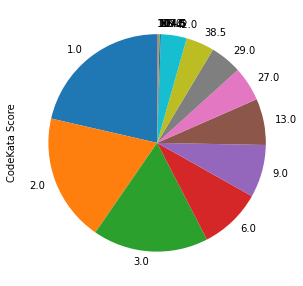

In [ ]:
df.groupby(['Department']).head(5).plot(kind='pie', y='CodeKata Score',figsize=(5, 5),startangle = 90,legend=False)        

                                  

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

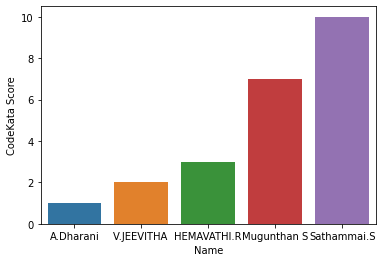

In [ ]:
import seaborn as sns
sns.barplot(y=df['CodeKata Score'].rank(ascending = False),x=df['Name'].head(5),data=df)